# Introducción al Análisis Exploratorio de Datos

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

In [3]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

## Dataframes

Conjunto de Datos en forma matricial (tabla) en don cada fila corresponde a una observacion (dato) y cada columna es un atributo correspondiente al dato (feature).

Los Dataframes tienen columnas.

Una columna es un vector de tamaño fijo de elementos de un mismo tipo acompañados de un indice para los mismos.

Se pueden realizar muchas operaciones sobre una columna.

operaciones matematicas o estadisticas sobre vectores como la:

- sumatoria
- promedio
- mediana
- varianza
- desviación standard.

Esto se puede aplicar una funcion a cada elemento de la columna (**map**) o aplicar una funcion a la columna entera (**apply**) en donde recibimos un vector (representando la columna) y podemos devolver un valor o un vector.


## Pandas

Implementacion de data frames (y otras estructuras de datos como Series) en python que provee herramientas para facilitar el analisis de datos en el mundo real.

Es la implementacion que usaremos para dar nuestros primeros pasos con data frames y brindar herramientas para realizar un analisis exploratorio de datos.

Mas informacion en: [https://pypi.python.org/pypi/pandas](https://pypi.python.org/pypi/pandas)

Independientemente que la clase es una guia practica para comenzar a utilizar pandas, les recomendamos la siguiente documentacion:

- **Basics**: [http://pandas.pydata.org/pandas-docs/stable/basics.htmlhttp://pandas.pydata.org/pandas-docs/stable/basics.html](http://pandas.pydata.org/pandas-docs/stable/basics.htmlhttp://pandas.pydata.org/pandas-docs/stable/basics.html)
- **Data Merging**: [http://pandas.pydata.org/pandas-docs/stable/merging.html](http://pandas.pydata.org/pandas-docs/stable/merging.html)
- **Split-Apply-Combine**: [http://pandas.pydata.org/pandas-docs/stable/groupby.html](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
- **Visualizacion**: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
- **Pandas SQL Comparison**: [http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)


Una forma de pensar en un DataFrame es pensar en el objeto por el que estan compuestos, las series. Es por eso que podemos pensar en un DataFrame como un conjunto de objetos Serie que comparten un indice (los nombres de las columnas). Es por eso que para empezar vamos a introducir el concepto de Serie.

### Series

Una Series es un objeto unidimensional similar a un array, lista o columna en una tabla.
Esta le va a asignar un indice con un label a aca elemento. Por default este sera numerico.

In [2]:
s = pd.Series(['This','is','a','Series'])
print(s)
#type(s)

0      This
1        is
2         a
3    Series
dtype: object


In [30]:
# o con un indice
s = pd.Series(['This','is','a','Series'], index=['A','B','C','D'])
print(s)

A      This
B        is
C         a
D    Series
dtype: object


Tambien pueden realizarse inicializaciones desde diccionarios, etc.

In [31]:
d = {'CABA': 10000, 'La Plata': 2000, 'Azul': 1000, 'Mar del Plata': 7000}
some_cities = pd.Series(d);
some_cities

Azul              1000
CABA             10000
La Plata          2000
Mar del Plata     7000
dtype: int64

In [32]:
# se puede acceder a un elemento en particular desde el indice
#some_cities['CABA']
type(some_cities[['La Plata','Mar del Plata']])

pandas.core.series.Series

O usar indexacion booleana

In [33]:
some_cities[some_cities <= 5000]

Azul        1000
La Plata    2000
dtype: int64

In [34]:
# veamos parcialmente que sucede
# de la operacion que realizamos sobre some_cities obtenemos una serie de True y False
some_cities <= 5000 
# que luego utilizamos sobre los valores correspondientes de some_cities para obtener los que cumplen
# este concepto se usa constantemente trabajando con pandas.

Azul              True
CABA             False
La Plata          True
Mar del Plata    False
dtype: bool

## Analisis Exploratorio de Datos: Flight Delays

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/usdot/flight-delays](https://www.kaggle.com/usdot/flight-delays)

El set de datos contiene informacion sobre retrasos de vuelos y cancelaciones durante el año 2015.

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [4]:
# carga de un data frame
#flights = pd.read_csv('../data/flight-delays/flights.csv', low_memory=False)
flights = pd.read_csv('../data/flight-delays/flights.csv', low_memory=False)

In [36]:
# veamos la informacion general del dataframe.
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [37]:
# vemos primeras filas del data frame
flights[:3]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#podemos los primeros valores
flights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#y los ultimos
flights.tail(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0
5819070,2015,12,31,4,B6,80,N584JB,RNO,JFK,2359,...,744.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819071,2015,12,31,4,B6,802,N589JB,SLC,MCO,2359,...,625.0,17.0,0,0,NaN,1.0,0.0,16.0,0.0,0.0
5819072,2015,12,31,4,B6,98,N607JB,DEN,JFK,2359,...,519.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,...,549.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flights.columns.values

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [9]:
# si queremos analizar cuales son los valores de las columnas podemos obtenerlos con .columns
for name in flights.columns.values:
    print (name)

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


Por otro lado muchas veces es necesario hacer algunas modificaciones en la forma en la que se cargan los datos del CSV dependiendo del formato del mismo, esto se puede hacer por ejemplo para ver como convertir datos (por ejemplo formatos de fechas), hasta tipos de separador, etc.


In [10]:
# sin index_col
airports = pd.read_csv('../data/flight-delays/airports.csv', sep=',', encoding='utf-8')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [75]:
# por ejemplo se puede usar index_col para indicar un indice
airports = pd.read_csv('../data/flight-delays/airports.csv', sep=',', encoding='utf-8', index_col='IATA_CODE')
airports.head()

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [43]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, ABE to YUM
Data columns (total 6 columns):
AIRPORT      322 non-null object
CITY         322 non-null object
STATE        322 non-null object
COUNTRY      322 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(4)
memory usage: 17.6+ KB


In [58]:
airlines = pd.read_csv('../data/flight-delays/airlines.csv', sep=',', encoding='utf-8')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [45]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
IATA_CODE    14 non-null object
AIRLINE      14 non-null object
dtypes: object(2)
memory usage: 304.0+ bytes


In [46]:
nj_airports = airports[airports['STATE'] == 'NJ']

In [47]:
type(nj_airports)

pandas.core.frame.DataFrame

In [48]:
nj_airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, ACY to TTN
Data columns (total 6 columns):
AIRPORT      3 non-null object
CITY         3 non-null object
STATE        3 non-null object
COUNTRY      3 non-null object
LATITUDE     3 non-null float64
LONGITUDE    3 non-null float64
dtypes: float64(2), object(4)
memory usage: 168.0+ bytes


### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```


In [49]:
print(flights.shape)
print(airports.shape)
print(airlines.shape)

(5819079, 31)
(322, 6)
(14, 2)


In [50]:
#print(airlines.isnull().any())
#print(airports.isnull().any())

In [51]:
print(flights.isnull().any())

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool


In [52]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [53]:
# metricas generales de las columnas o features del data frame que podemos analizar via .describe
print(flights.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

In [54]:
#algunas verificaciones

cancelled_flights_count = flights['CANCELLED'].sum()
#sobre el total de filas restamos aquellas que no tiene una cancelacion
# .shape nos devuelve la dimensionalidad del data frame (filas x columnas).
flights_with_cancellation_reason = flights.shape[0] - flights.CANCELLATION_REASON.isnull().sum()

In [55]:
# solo vuelos cancelados tienen razon de cancelacion?
print(cancelled_flights_count)
print(flights_with_cancellation_reason)

89884
89884


### Cantidad de Vuelos a Aeropuertos de Destino

In [56]:
flights['DESTINATION_AIRPORT'][:3] #realizamos una proyeccion

0    SEA
1    PBI
2    CLT
Name: DESTINATION_AIRPORT, dtype: object

In [57]:
count_flights_to_airports = flights['DESTINATION_AIRPORT'].value_counts()

In [58]:
count_flights_to_airports

ATL      346904
ORD      285906
DFW      239582
DEN      196010
LAX      194696
SFO      147966
PHX      146812
IAH      146683
LAS      133198
MSP      112128
MCO      110980
SEA      110907
DTW      108398
BOS      107851
EWR      101830
CLT      100322
LGA       99581
SLC       97193
JFK       93809
BWI       86085
MDW       80884
DCA       73799
FLL       73599
SAN       70207
MIA       69324
PHL       66017
TPA       63914
DAL       59703
HOU       52041
BNA       47568
          ...  
12888        53
11525        53
14109        53
12255        53
12343        53
10333        53
11587        53
10739        53
12177        53
13127        53
10918        53
11447        48
13964        36
ITH          35
10170        31
12016        31
11097        31
10154        28
10581        26
13459        26
12265        22
12094        20
15497        14
14025        13
13541        11
10165         9
14222         9
13502         7
11503         3
10666         1
Name: DESTINATION_AIRPOR

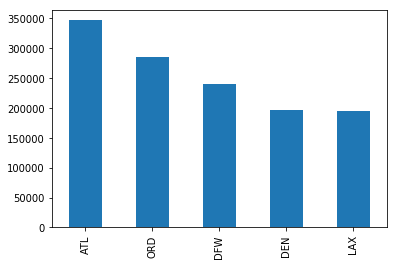

In [59]:
%matplotlib inline
#%matplotlib notebook
# top 20
count_flights_to_airports[:5].plot('bar')

In [60]:
airports[airports.index == 'ITH']

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
ITH,Ithaca Tompkins Regional Airport,Ithaca,NY,USA,42.49103,-76.45844


### Que sucede yendo desde Los Angeles a Atlanta

In [61]:
# subsetting, filtering o seleccion
atl_flights = flights[flights['DESTINATION_AIRPORT'] == "ATL"]
atl_flights[['AIRLINE','DESTINATION_AIRPORT']].describe()

,AIRLINE,DESTINATION_AIRPORT
count,346904,346904
unique,11,1
top,DL,ATL
freq,221673,346904


In [62]:
atl_flights['DESTINATION_AIRPORT'].describe()

count     346904
unique         1
top          ATL
freq      346904
Name: DESTINATION_AIRPORT, dtype: object

In [63]:
# para entender como funciona veamos la expresion
flights['DESTINATION_AIRPORT'] == "ATL"

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9           True
10          True
11         False
12         False
13          True
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
5819049    False
5819050    False
5819051    False
5819052    False
5819053    False
5819054    False
5819055    False
5819056    False
5819057    False
5819058    False
5819059    False
5819060    False
5819061    False
5819062    False
5819063    False
5819064    False
5819065    False
5819066    False
5819067    False
5819068    False
5819069    False
5819070    False
5819071    False
5819072    False
5819073    False
5819074    False
5819075    False
5819076    Fal

In [64]:
atl_flights['AIRLINE'].value_counts()

DL    221673
EV     57056
WN     39508
AA      7499
F9      4492
NK      4372
OO      4227
UA      3412
US      2940
MQ      1295
AS       430
Name: AIRLINE, dtype: int64

In [65]:
airlines[airlines.IATA_CODE == 'WN']

,IATA_CODE,AIRLINE
8,WN,Southwest Airlines Co.


In [13]:
# al indexar nuestro data frame con la columna de True y False solamente obtendremos aquellos con false.
# tambien es posible adicionar condiciones con operadores logicos
is_from_lax = flights['ORIGIN_AIRPORT'] == "LAX"
is_to_atl = flights['DESTINATION_AIRPORT'] == "ATL"
lax_to_atl_flights = flights[is_from_lax & is_to_atl]
lax_to_atl_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
268,2015,1,1,4,DL,2154,N813DN,LAX,ATL,600,...,1250.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1269,2015,1,1,4,DL,369,N144DA,LAX,ATL,730,...,1423.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2425,2015,1,1,4,WN,1191,N7812G,LAX,ATL,900,...,1621.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2707,2015,1,1,4,DL,80,N845MH,LAX,ATL,915,...,1609.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4728,2015,1,1,4,DL,101,N826DN,LAX,ATL,1130,...,1856.0,16.0,0,0,NaN,0.0,0.0,16.0,0.0,0.0


In [14]:
lax_to_atl_flights['DESTINATION_AIRPORT'].describe()

count     5673
unique       1
top        ATL
freq      5673
Name: DESTINATION_AIRPORT, dtype: object

In [15]:
lax_to_atl_flights['CANCELLED'].value_counts()

0    5646
1      27
Name: CANCELLED, dtype: int64

In [16]:
# deberia darme 27
lax_to_atl_flights['CANCELLED'].sum()

27

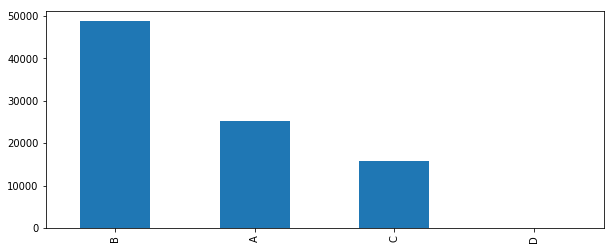

In [69]:
fig = plt.figure(figsize=(10,4));

flights['CANCELLATION_REASON'].value_counts().plot('bar')

In [17]:
flights['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

## Que Aeropuerto de Origen tiene las mayor cantidad de cancelaciones

In [18]:
# filtro primero los cancelados
cancelled_flights = flights[flights['CANCELLED'] == 1]
# luego agrupo por origin
cancelled_flights['ORIGIN_AIRPORT'].value_counts()[:10]

ORD    8548
DFW    6254
LGA    4531
EWR    3110
BOS    2654
ATL    2557
LAX    2164
SFO    2148
IAH    2130
DEN    2123
Name: ORIGIN_AIRPORT, dtype: int64

In [20]:
#cuento los totales
flights_per_origin_count = flights['ORIGIN_AIRPORT'].count()
flights_per_origin_count

5819079

In [25]:
# obtengo la cantidad de datos por origen
flights_per_origin_count = flights['ORIGIN_AIRPORT'].value_counts()
#filtro aquellos que tienen mas de 37392 vuelos por origen
flights_per_origin_count = flights_per_origin_count[flights_per_origin_count >= 37392]
flights_per_origin_count.tail()

OAK    42316
AUS    42067
MSY    38804
MCI    38665
SJC    38200
Name: ORIGIN_AIRPORT, dtype: int64

In [26]:
# de los cancelados, cuento la cantidad de datos por cada origen
flights_cancelled_per_origin = cancelled_flights['ORIGIN_AIRPORT'].value_counts()
flights_cancelled_per_origin.tail()

12323    1
11921    1
13970    1
11587    1
10257    1
Name: ORIGIN_AIRPORT, dtype: int64

In [27]:
is_cancelled = flights['CANCELLED'] == 1
cancelled_flights = flights[is_cancelled]
cancelled_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [33]:
cancellation_ratio = flights_cancelled_per_origin.astype(float) / flights_per_origin_count.astype(float)
# muestro solo los que son no nulos
cancellation_ratio[cancellation_ratio.notnull()].head()

ATL    0.007372
AUS    0.013740
BNA    0.022404
BOS    0.024609
BWI    0.017809
Name: ORIGIN_AIRPORT, dtype: float64

In [77]:
top_20_cancellation_ratio = cancellation_ratio.sort_values(ascending=False)[:20]

In [78]:
top_20_cancellation_ratio

LGA    0.045490
EWR    0.030559
ORD    0.029900
DCA    0.027468
DFW    0.026107
BOS    0.024609
MDW    0.024219
BNA    0.022404
JFK    0.020488
BWI    0.017809
PHL    0.016268
HOU    0.014873
IAH    0.014527
SFO    0.014513
DAL    0.014238
STL    0.013777
AUS    0.013740
OAK    0.013541
DTW    0.011705
SJC    0.011466
Name: ORIGIN_AIRPORT, dtype: float64

In [79]:
flights_per_origin_count['LGA']

99605

In [80]:
airports[airports.index == 'LGA']

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
LGA,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261


In [77]:
# asi funciona reset_index: agarra como columna el valor del agrupado. Es decir, "destranforma" el indice
airports[airports.index == 'LGA'].reset_index()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,LGA,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261


In [81]:
# comentar uso media
flights_per_origin_count.describe()

count        38.000000
mean     104240.605263
std       69855.604314
min       38200.000000
25%       53956.250000
50%       89945.000000
75%      111833.250000
max      346836.000000
Name: ORIGIN_AIRPORT, dtype: float64

### Cancelaciones por dia de la Semana

In [34]:
# split-apply-combine
flights.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], dtype=object)

In [36]:
day_of_week = flights[['MONTH','CANCELLED']]
day_of_week.head()

,MONTH,CANCELLED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
day_of_week_counts = day_of_week.groupby('MONTH')
day_of_week_counts.head()

,MONTH,CANCELLED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
469968,2,0
469969,2,0
469970,2,0
469971,2,0
469972,2,0


In [38]:
day_of_week_counts = day_of_week.groupby('MONTH').aggregate(sum)
#day_of_week_counts.index = ['Enero', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
day_of_week_counts

,CANCELLED
MONTH,
1,11982
2,20517
3,11002
4,4520
5,5694
6,9120
7,4806
8,5052
9,2075


In [41]:
# es lo mismo que 
my_data_of_week = day_of_week.groupby('MONTH').sum()
#day_of_week_counts.index = ['Enero', 'Martes', 'Miercoles', 'Jueves',

In [43]:
# y el cambio el indice
my_data_of_week.index = ['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio','Julio','Agosto','S','O','N','D']
my_data_of_week

,CANCELLED
Enero,11982
Febrero,20517
Marzo,11002
Abril,4520
Mayo,5694
Junio,9120
Julio,4806
Agosto,5052
S,2075
O,2454


In [44]:
day_of_week_counts.plot(kind='bar')

In [45]:
day_of_week_counts.plot(kind='area')

In [46]:
operated  = flights[['MONTH','CANCELLED']][flights['CANCELLED'] == 0].groupby('MONTH').count() # operated
cancelled = flights[['MONTH','CANCELLED']][flights['CANCELLED'] != 0].groupby('MONTH').count() # cancelled

In [47]:
operated

,CANCELLED
MONTH,
1,457986
2,408674
3,493310
4,480631
5,491299
6,494777
7,515912
8,505484
9,462871


In [50]:
# cual es la diferencia con sum?
flights[['MONTH','CANCELLED']][flights['CANCELLED'] == 0].groupby('MONTH').count() # operated
# la diferencia reside en que sum suma el contenido de la fila, en cambio count cuenta la cantidad registros

,CANCELLED
MONTH,
1,457986
2,408674
3,493310
4,480631
5,491299
6,494777
7,515912
8,505484
9,462871


In [51]:
# entonces esto si deberia ser igual!
flights[['MONTH','CANCELLED']][flights['CANCELLED'] != 0].groupby('MONTH').sum() == flights[['MONTH','CANCELLED']][flights['CANCELLED'] != 0].groupby('MONTH').count()

,CANCELLED
MONTH,
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [48]:
operated.rename(columns={'CANCELLED': 'OPERATED'}, inplace=True)
operated

,OPERATED
MONTH,
1,457986
2,408674
3,493310
4,480631
5,491299
6,494777
7,515912
8,505484
9,462871


In [52]:
cancelled

,CANCELLED
MONTH,
1,11982
2,20517
3,11002
4,4520
5,5694
6,9120
7,4806
8,5052
9,2075


In [53]:
#merge por index, inner join
operated_and_cancelled = pd.merge(operated, cancelled, right_index=True, left_index=True)
operated_and_cancelled

,OPERATED,CANCELLED
MONTH,,
1,457986,11982
2,408674,20517
3,493310,11002
4,480631,4520
5,491299,5694
6,494777,9120
7,515912,4806
8,505484,5052
9,462871,2075


In [54]:
operated_and_cancelled.plot(kind="area", stacked=False)

In [55]:
operated_and_cancelled.plot(kind="area", stacked=True)

In [56]:
operated_and_cancelled.plot(kind="bar", stacked=True)

Nota: Reutilizar analisis sobre MONTH

### Utilizando los nombres de las Aerolineas

In [60]:
# left join
flights_with_airlines = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')

In [61]:
flights_with_airlines.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [62]:
#axis indica si se aplica sobre el indice o las columnas.
flights_with_airlines.drop('IATA_CODE', axis=1, inplace=True)
flights_with_airlines.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

In [63]:
flights_with_airlines.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


### Cantidad de Vuelos por Aerolinea

In [66]:
flights_with_airlines.groupby(['AIRLINE']).head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Spirit Air Lines
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.


In [68]:
flights_with_airlines.groupby(['AIRLINE'])['FLIGHT_NUMBER'].head()

0         98
1       2336
2        840
3        258
4        135
5        806
6        612
7       2013
8       1112
9       1173
10      2336
11      1674
12      1434
13      2324
15       108
17      1197
18       122
20       520
21       371
22       214
25      1545
26       130
27       597
28       413
30       168
35        17
36       617
37      1528
39       304
45      1990
        ... 
66      7404
67      7419
68      5254
72      4354
76      4685
77      5583
78      5484
80       103
81      5187
82      2859
87      5764
88      1279
114      161
126      365
127      117
128     2926
147     3534
155      526
166     3161
184     4122
185     4822
186     2215
187      676
297      865
306     2898
707      922
846      399
847      897
985       12
1246     404
Name: FLIGHT_NUMBER, dtype: int64

In [69]:
flights_with_airlines.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()

AIRLINE
Alaska Airlines Inc.             172521
American Airlines Inc.           725984
American Eagle Airlines Inc.     294632
Atlantic Southeast Airlines      571977
Delta Air Lines Inc.             875881
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
JetBlue Airways                  267048
Skywest Airlines Inc.            588353
Southwest Airlines Co.          1261855
Spirit Air Lines                 117379
US Airways Inc.                  198715
United Air Lines Inc.            515723
Virgin America                    61903
Name: FLIGHT_NUMBER, dtype: int64

In [70]:
flights_with_airlines.groupby(['AIRLINE'])['FLIGHT_NUMBER'].sum()

AIRLINE
Alaska Airlines Inc.              73650485
American Airlines Inc.           930458522
American Eagle Airlines Inc.     976164658
Atlantic Southeast Airlines     2692126057
Delta Air Lines Inc.            1415689021
Frontier Airlines Inc.            74499475
Hawaiian Airlines Inc.            16587390
JetBlue Airways                  243401193
Skywest Airlines Inc.           3029514377
Southwest Airlines Co.          2283711458
Spirit Air Lines                  63558819
US Airways Inc.                  263036318
United Air Lines Inc.            547410018
Virgin America                    35590551
Name: FLIGHT_NUMBER, dtype: int64

In [71]:
pd.DataFrame({'FLIGHT_COUNT' : flights_with_airlines.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()})

,FLIGHT_COUNT
AIRLINE,
Alaska Airlines Inc.,172521
American Airlines Inc.,725984
American Eagle Airlines Inc.,294632
Atlantic Southeast Airlines,571977
Delta Air Lines Inc.,875881
Frontier Airlines Inc.,90836
Hawaiian Airlines Inc.,76272
JetBlue Airways,267048
Skywest Airlines Inc.,588353


In [64]:
airline_flight_count = pd.DataFrame({'FLIGHT_COUNT' : flights_with_airlines.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()}).reset_index()

In [65]:
airline_flight_count

,AIRLINE,FLIGHT_COUNT
0,Alaska Airlines Inc.,172521
1,American Airlines Inc.,725984
2,American Eagle Airlines Inc.,294632
3,Atlantic Southeast Airlines,571977
4,Delta Air Lines Inc.,875881
5,Frontier Airlines Inc.,90836
6,Hawaiian Airlines Inc.,76272
7,JetBlue Airways,267048
8,Skywest Airlines Inc.,588353
9,Southwest Airlines Co.,1261855


In [78]:
airline_flight_count.sort_values(by='FLIGHT_COUNT', ascending=True)

,AIRLINE,FLIGHT_COUNT
13,Virgin America,61903
6,Hawaiian Airlines Inc.,76272
5,Frontier Airlines Inc.,90836
10,Spirit Air Lines,117379
0,Alaska Airlines Inc.,172521
11,US Airways Inc.,198715
7,JetBlue Airways,267048
2,American Eagle Airlines Inc.,294632
12,United Air Lines Inc.,515723
3,Atlantic Southeast Airlines,571977


### Cantidad total de vuelos

In [79]:
airline_flight_total_count = airline_flight_count['FLIGHT_COUNT'].sum()
airline_flight_total_count

5819079

### Calculando el Porcentaje de Vuelos

In [80]:
airline_flight_count['AIRLINE_FLIGHT_PERCENTAGE'] = airline_flight_count['FLIGHT_COUNT'] / airline_flight_total_count

In [81]:
airline_flight_count

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE
0,Alaska Airlines Inc.,172521,0.029647
1,American Airlines Inc.,725984,0.124759
2,American Eagle Airlines Inc.,294632,0.050632
3,Atlantic Southeast Airlines,571977,0.098293
4,Delta Air Lines Inc.,875881,0.150519
5,Frontier Airlines Inc.,90836,0.015610
6,Hawaiian Airlines Inc.,76272,0.013107
7,JetBlue Airways,267048,0.045892
8,Skywest Airlines Inc.,588353,0.101108
9,Southwest Airlines Co.,1261855,0.216848


Podemos realizar tambien algunas verificaciones, como que los porcentajes cierren, etc.


In [82]:
plt.figure()
#comparar porcentaje y totales
airline_flight_count.set_index(['AIRLINE'])['AIRLINE_FLIGHT_PERCENTAGE'].plot.pie(figsize=(8, 8),autopct='%.2f')

### Calculando Tasas de Cancelaciones por Aerolinea

In [83]:
airline_cancellation_rate = pd.DataFrame({'CANCELLATION_RATE' : flights_with_airlines.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()

In [84]:
airline_cancellation_rate

,AIRLINE,CANCELLATION_RATE
0,Alaska Airlines Inc.,0.003878
1,American Airlines Inc.,0.015040
2,American Eagle Airlines Inc.,0.050996
3,Atlantic Southeast Airlines,0.026629
4,Delta Air Lines Inc.,0.004366
5,Frontier Airlines Inc.,0.006473
6,Hawaiian Airlines Inc.,0.002242
7,JetBlue Airways,0.016012
8,Skywest Airlines Inc.,0.016929
9,Southwest Airlines Co.,0.012714


In [85]:
airline_divertion_rate = pd.DataFrame({'DIVERTION_RATE' : flights_with_airlines.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
airline_divertion_rate

,AIRLINE,DIVERTION_RATE
0,Alaska Airlines Inc.,0.002394
1,American Airlines Inc.,0.002934
2,American Eagle Airlines Inc.,0.002770
3,Atlantic Southeast Airlines,0.003486
4,Delta Air Lines Inc.,0.002035
5,Frontier Airlines Inc.,0.001739
6,Hawaiian Airlines Inc.,0.000787
7,JetBlue Airways,0.002734
8,Skywest Airlines Inc.,0.002684
9,Southwest Airlines Co.,0.002702


### Juntando la Informacion en un mismo Data Frame

In [86]:
# left join
airline_ranking = pd.merge(airline_flight_count, airline_cancellation_rate, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_ranking

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE
0,Alaska Airlines Inc.,172521,0.029647,0.003878
1,American Airlines Inc.,725984,0.124759,0.015040
2,American Eagle Airlines Inc.,294632,0.050632,0.050996
3,Atlantic Southeast Airlines,571977,0.098293,0.026629
4,Delta Air Lines Inc.,875881,0.150519,0.004366
5,Frontier Airlines Inc.,90836,0.015610,0.006473
6,Hawaiian Airlines Inc.,76272,0.013107,0.002242
7,JetBlue Airways,267048,0.045892,0.016012
8,Skywest Airlines Inc.,588353,0.101108,0.016929
9,Southwest Airlines Co.,1261855,0.216848,0.012714


In [87]:
# left join
airline_ranking = pd.merge(airline_ranking, airline_divertion_rate, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_ranking

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE,DIVERTION_RATE
0,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394
1,American Airlines Inc.,725984,0.124759,0.015040,0.002934
2,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
3,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486
4,Delta Air Lines Inc.,875881,0.150519,0.004366,0.002035
5,Frontier Airlines Inc.,90836,0.015610,0.006473,0.001739
6,Hawaiian Airlines Inc.,76272,0.013107,0.002242,0.000787
7,JetBlue Airways,267048,0.045892,0.016012,0.002734
8,Skywest Airlines Inc.,588353,0.101108,0.016929,0.002684
9,Southwest Airlines Co.,1261855,0.216848,0.012714,0.002702


### Visualizando el Ranking

In [88]:
airline_ranking_sorted = airline_ranking.sort_values(by='FLIGHT_COUNT',ascending=False)

In [89]:
airline_ranking_sorted

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE,DIVERTION_RATE
9,Southwest Airlines Co.,1261855,0.216848,0.012714,0.002702
4,Delta Air Lines Inc.,875881,0.150519,0.004366,0.002035
1,American Airlines Inc.,725984,0.124759,0.015040,0.002934
8,Skywest Airlines Inc.,588353,0.101108,0.016929,0.002684
3,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486
12,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
2,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
7,JetBlue Airways,267048,0.045892,0.016012,0.002734
11,US Airways Inc.,198715,0.034149,0.020466,0.002139
0,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394


In [90]:
airline_ranking_sorted.reset_index()

,index,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE,DIVERTION_RATE
0,9,Southwest Airlines Co.,1261855,0.216848,0.012714,0.002702
1,4,Delta Air Lines Inc.,875881,0.150519,0.004366,0.002035
2,1,American Airlines Inc.,725984,0.124759,0.015040,0.002934
3,8,Skywest Airlines Inc.,588353,0.101108,0.016929,0.002684
4,3,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486
5,12,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
6,2,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
7,7,JetBlue Airways,267048,0.045892,0.016012,0.002734
8,11,US Airways Inc.,198715,0.034149,0.020466,0.002139
9,0,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394


Ver correlacion entre variables con scatter

In [91]:
airline_ranking_sorted.plot.scatter(x='FLIGHT_COUNT',y='CANCELLATION_RATE', label='AIRLINE')

In [92]:
airline_ranking_sorted.plot.scatter(x='FLIGHT_COUNT',y='DIVERTION_RATE')

In [93]:
airline_ranking_sorted[airline_ranking_sorted.index != 2].plot.scatter(x='CANCELLATION_RATE',y='DIVERTION_RATE')

### Incorporando Fechas

In [94]:
flights_with_airlines['DATE'] = pd.to_datetime(flights[['YEAR','MONTH','DAY']], yearfirst=True)

In [96]:
flights_with_airlines.groupby('DATE').count()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13950,13950,13950,13950,13950,13950,13929,13950,13950,13950,...,13464,13950,13950,466,2987,2987,2987,2987,2987,13950
2015-01-02,16741,16741,16741,16741,16741,16741,16733,16741,16741,16741,...,16456,16741,16741,257,4568,4568,4568,4568,4568,16741
2015-01-03,15434,15434,15434,15434,15434,15434,15408,15434,15434,15434,...,15050,15434,15434,331,6805,6805,6805,6805,6805,15434
2015-01-04,16352,16352,16352,16352,16352,16352,16337,16352,16352,16352,...,15887,16352,16352,433,7833,7833,7833,7833,7833,16352
2015-01-05,16548,16548,16548,16548,16548,16548,16511,16548,16548,16548,...,16074,16548,16548,435,5634,5634,5634,5634,5634,16548
2015-01-06,15315,15315,15315,15315,15315,15315,15266,15315,15315,15315,...,14876,15315,15315,395,5515,5515,5515,5515,5515,15315
2015-01-07,15571,15571,15571,15571,15571,15571,15537,15571,15571,15571,...,15234,15571,15571,303,4355,4355,4355,4355,4355,15571
2015-01-08,16009,16009,16009,16009,16009,16009,15972,16009,16009,16009,...,15113,16009,16009,813,3787,3787,3787,3787,3787,16009
2015-01-09,16008,16008,16008,16008,16008,16008,15938,16008,16008,16008,...,15504,16008,16008,469,4269,4269,4269,4269,4269,16008


In [95]:
# claramente hizo esto para quedarse con alguna columna conocida
flights_with_airlines.groupby('DATE').count()['SCHEDULED_DEPARTURE']

DATE
2015-01-01    13950
2015-01-02    16741
2015-01-03    15434
2015-01-04    16352
2015-01-05    16548
2015-01-06    15315
2015-01-07    15571
2015-01-08    16009
2015-01-09    16008
2015-01-10    12344
2015-01-11    14754
2015-01-12    15888
2015-01-13    15180
2015-01-14    15520
2015-01-15    16020
2015-01-16    16070
2015-01-17    12070
2015-01-18    13855
2015-01-19    15841
2015-01-20    15187
2015-01-21    15525
2015-01-22    16013
2015-01-23    16056
2015-01-24    12280
2015-01-25    14720
2015-01-26    15890
2015-01-27    15155
2015-01-28    15525
2015-01-29    16030
2015-01-30    16080
              ...  
2015-12-02    15860
2015-12-03    16278
2015-12-04    16215
2015-12-05    12200
2015-12-06    15101
2015-12-07    16043
2015-12-08    15575
2015-12-09    15849
2015-12-10    16259
2015-12-11    16263
2015-12-12    12239
2015-12-13    15116
2015-12-14    16056
2015-12-15    15670
2015-12-16    16100
2015-12-17    16579
2015-12-18    16710
2015-12-19    14724
2015-12-20    1

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

flights_with_airlines.groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='b', label="scheduled");
flights_with_airlines[flights_with_airlines['CANCELLED'] == 0].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='g', label="operated");
flights_with_airlines[flights_with_airlines['CANCELLED'] == 1].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='r', label="cancelled");

ax.legend();

### Apendice: Modificando los datos en data frame (map, apply)

In [101]:
airline_ranking_sorted.reset_index()['AIRLINE_FLIGHT_PERCENTAGE'].map(lambda x: x * 100)

0     21.684789
1     15.051884
2     12.475926
3     10.110758
4      9.829339
5      8.862622
6      5.063207
7      4.589180
8      3.414887
9      2.964748
10     2.017141
11     1.561003
12     1.310723
13     1.063794
Name: AIRLINE_FLIGHT_PERCENTAGE, dtype: float64

In [102]:
# pandas.Series.map
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html

airline_ranking_sorted['AIRLINE_FLIGHT_PERCENTAGE'].map(lambda x: x * 100)

9     21.684789
4     15.051884
1     12.475926
8     10.110758
3      9.829339
12     8.862622
2      5.063207
7      4.589180
11     3.414887
0      2.964748
10     2.017141
5      1.561003
6      1.310723
13     1.063794
Name: AIRLINE_FLIGHT_PERCENTAGE, dtype: float64

In [103]:
## pandas.DataFrame.applymap
# hace sentido en dataframes a los que les podamos aplicar la funcion a cada elemento
# hace el mismo resultado que aplicar map por columna

am_df = pd.DataFrame(np.random.randn(3, 3))
am_df

,0,1,2
0,1.009891,-0.237765,1.006037
1,-1.017780,1.162040,-1.271409
2,-0.591095,0.949048,0.403087


In [104]:
am_df.applymap(lambda x: '%.2f' % x)

,0,1,2
0,1.01,-0.24,1.01
1,-1.02,1.16,-1.27
2,-0.59,0.95,0.40


In [105]:
## pandas.DataFrame.apply
# 

def normalize(col):
  mu = col.mean()
  return col.map(lambda x:x-mu)

a_df = pd.DataFrame(np.random.randn(3, 3))
a_df


,0,1,2
0,1.094864,-0.069499,-0.860208
1,0.202747,0.800192,2.010591
2,0.672679,0.479871,-1.981821


In [106]:
a_df.apply(normalize)

,0,1,2
0,0.438101,-0.47302,-0.583062
1,-0.454017,0.39667,2.287737
2,0.015915,0.07635,-1.704675
